In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [3]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models'

CH = 23
train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=128, CH = CH)

In [4]:
len(train_loader), len(val_loader), len(test_loader)

(11, 8, 17)

In [5]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 15])
torch.Size([128, 1])
128
128
128


date:180325, rec:001, time:2112.0


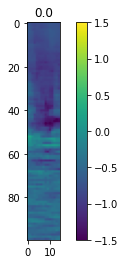

date:180401, rec:001, time:5239.0


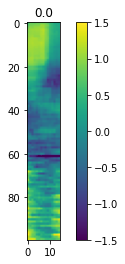

date:180401, rec:001, time:792.0


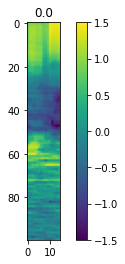

date:180325, rec:007, time:6515.0


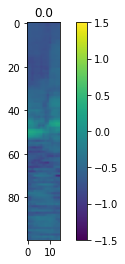

date:180324, rec:008, time:3610.0


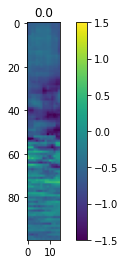

date:180325, rec:001, time:1767.0


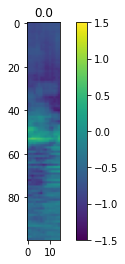

date:180324, rec:009, time:1270.0


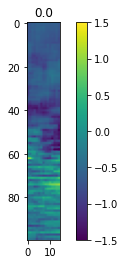

date:180401, rec:001, time:267.0


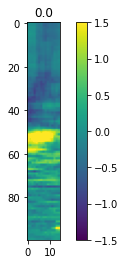

date:180325, rec:007, time:3600.0


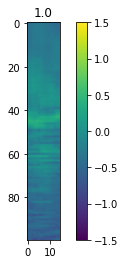

date:180325, rec:004, time:6867.0


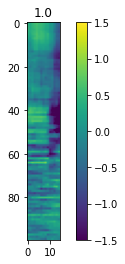

date:180324, rec:008, time:2023.0


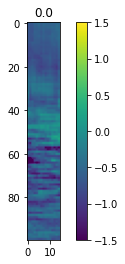

date:180322, rec:007, time:4127.0


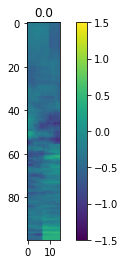

date:180324, rec:005, time:2971.0


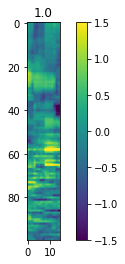

date:180324, rec:008, time:6631.0


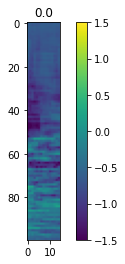

date:180324, rec:008, time:1828.0


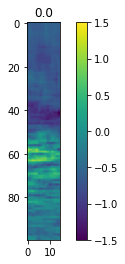

date:180325, rec:007, time:5540.0


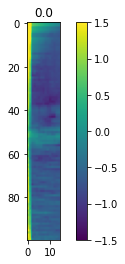

date:180322, rec:005, time:1387.0


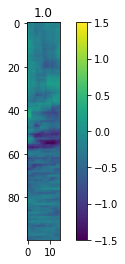

date:180325, rec:007, time:6830.0


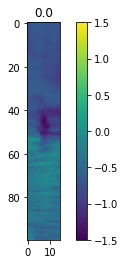

date:180325, rec:005, time:225.0


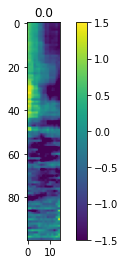

date:180325, rec:009, time:3378.0


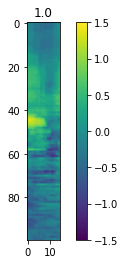

date:180325, rec:002, time:2727.0


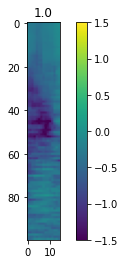

date:180325, rec:009, time:42.0


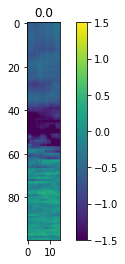

date:180325, rec:001, time:1362.0


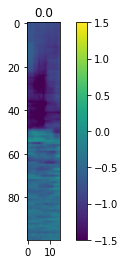

date:180325, rec:001, time:5434.0


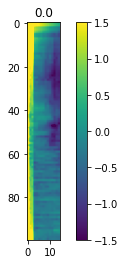

date:180325, rec:001, time:1902.0


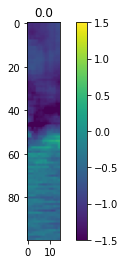

date:180325, rec:009, time:1002.0


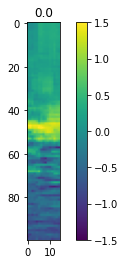

date:180323, rec:007, time:6548.0


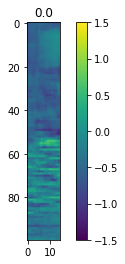

date:180325, rec:005, time:3450.0


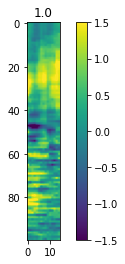

date:180323, rec:007, time:4694.0


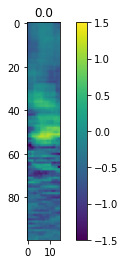

date:180325, rec:002, time:3896.0


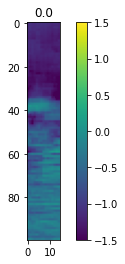

date:180325, rec:007, time:2878.0


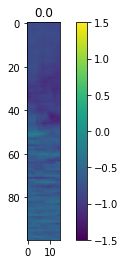

date:180325, rec:001, time:1782.0


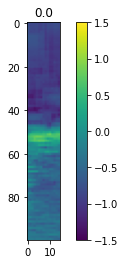

date:180325, rec:003, time:3519.0


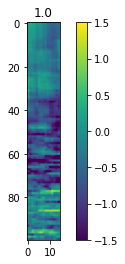

date:180325, rec:009, time:4946.0


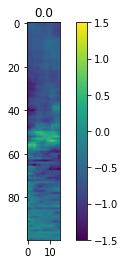

date:180324, rec:008, time:5716.0


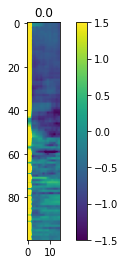

date:180322, rec:001, time:42.0


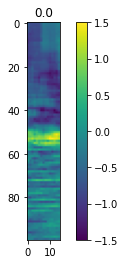

date:180323, rec:007, time:4679.0


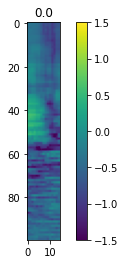

date:180324, rec:008, time:1288.0


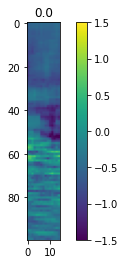

date:180323, rec:003, time:3433.0


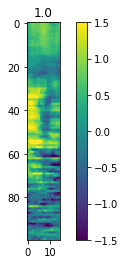

date:180322, rec:007, time:1649.0


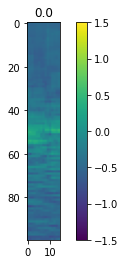

date:180325, rec:009, time:1092.0


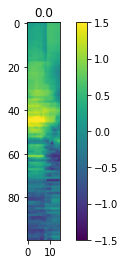

date:180325, rec:009, time:2577.0


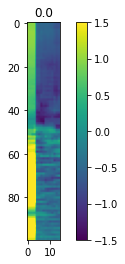

date:180401, rec:001, time:1197.0


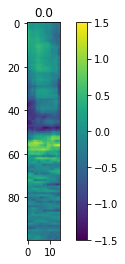

date:180401, rec:001, time:387.0


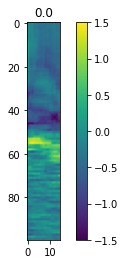

date:180322, rec:007, time:4487.0


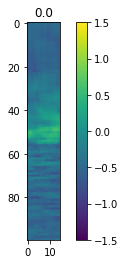

date:180324, rec:008, time:2755.0


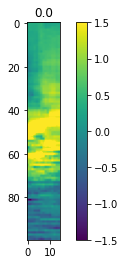

date:180401, rec:001, time:5374.0


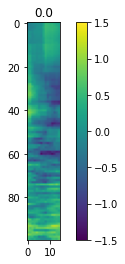

date:180325, rec:009, time:567.0


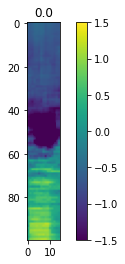

date:180323, rec:007, time:2246.0


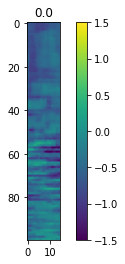

date:180325, rec:007, time:6530.0


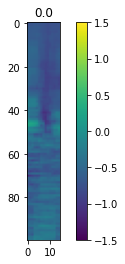

date:180325, rec:007, time:5885.0


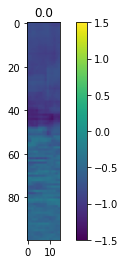

date:180323, rec:007, time:4338.0


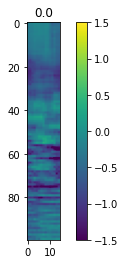

date:180325, rec:007, time:4040.0


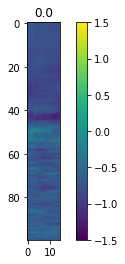

date:180324, rec:008, time:2113.0


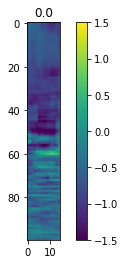

date:180325, rec:009, time:1632.0


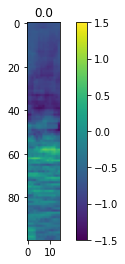

date:180325, rec:004, time:5488.0


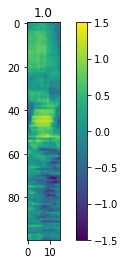

date:180325, rec:006, time:3595.0


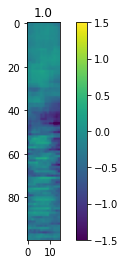

date:180325, rec:009, time:5006.0


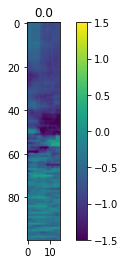

date:180325, rec:007, time:4595.0


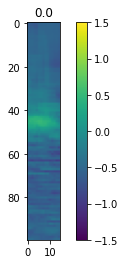

date:180325, rec:003, time:2327.0


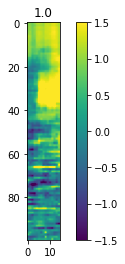

date:180323, rec:007, time:3047.0


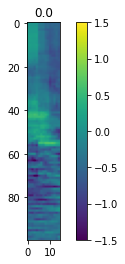

date:180323, rec:007, time:2201.0


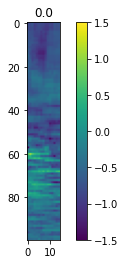

date:180325, rec:009, time:6467.0


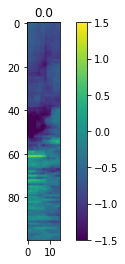

date:180325, rec:001, time:4233.0


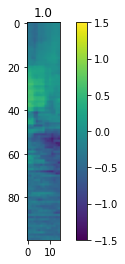

date:180323, rec:007, time:4323.0


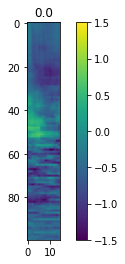

date:180325, rec:009, time:1902.0


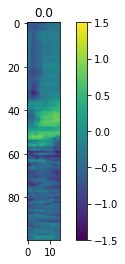

date:180324, rec:008, time:2605.0


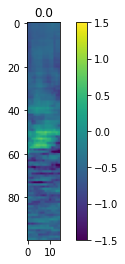

date:180322, rec:007, time:4517.0


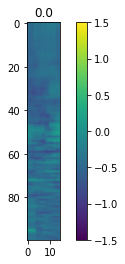

date:180325, rec:005, time:6951.0


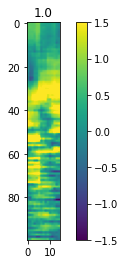

date:180325, rec:005, time:27.0


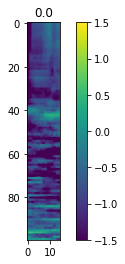

date:180401, rec:001, time:5900.0


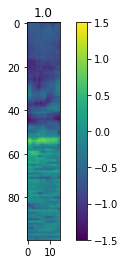

date:180323, rec:001, time:6715.0


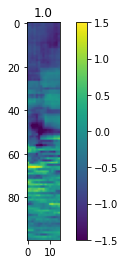

date:180325, rec:007, time:3253.0


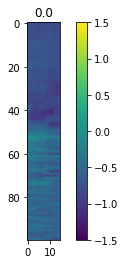

date:180324, rec:009, time:222.0


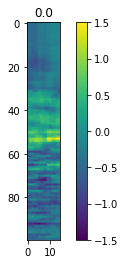

date:180401, rec:001, time:1752.0


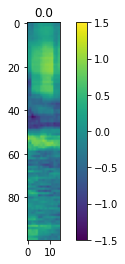

date:180322, rec:001, time:27.0


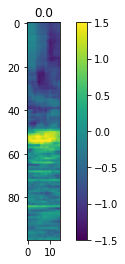

date:180323, rec:007, time:4278.0


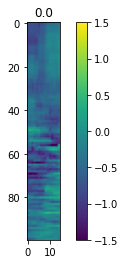

date:180324, rec:008, time:3760.0


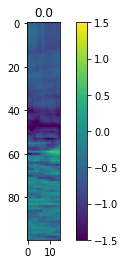

date:180401, rec:001, time:3066.0


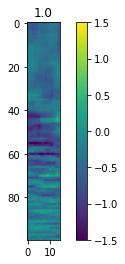

date:180325, rec:001, time:1752.0


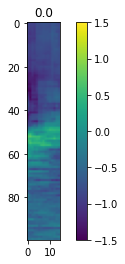

date:180324, rec:008, time:2365.0


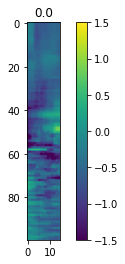

date:180324, rec:001, time:865.0


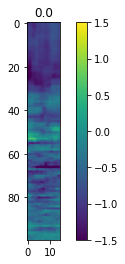

date:180325, rec:003, time:2252.0


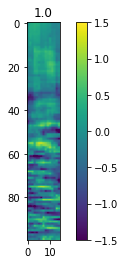

date:180325, rec:007, time:6950.0


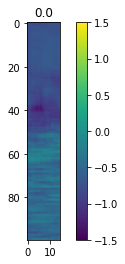

date:180325, rec:009, time:1197.0


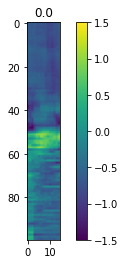

date:180324, rec:001, time:910.0


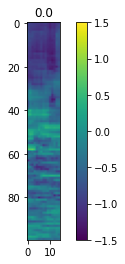

date:180401, rec:001, time:5960.0


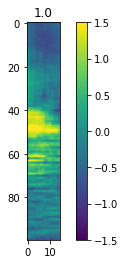

date:180325, rec:007, time:2638.0


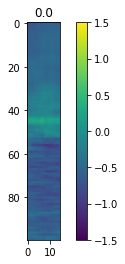

date:180325, rec:001, time:1917.0


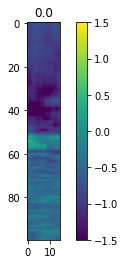

date:180322, rec:007, time:4982.0


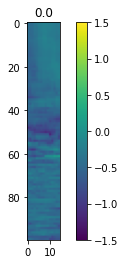

date:180324, rec:009, time:1014.0


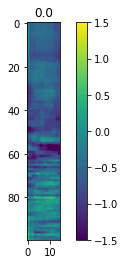

date:180324, rec:001, time:597.0


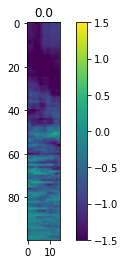

date:180322, rec:001, time:102.0


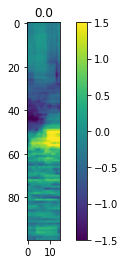

date:180324, rec:008, time:1468.0


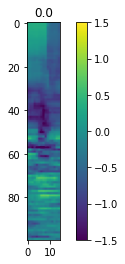

date:180322, rec:007, time:5027.0


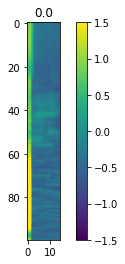

date:180323, rec:003, time:1154.0


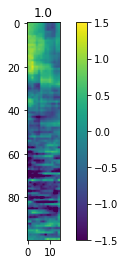

date:180401, rec:001, time:5344.0


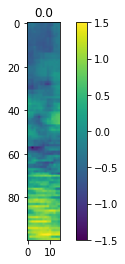

date:180322, rec:004, time:5428.0


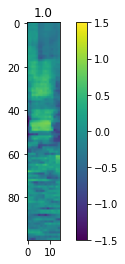

date:180324, rec:009, time:177.0


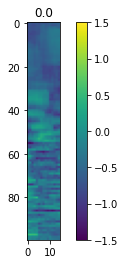

date:180322, rec:007, time:5057.0


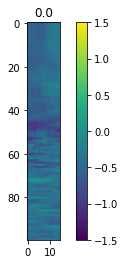

date:180324, rec:008, time:5371.0


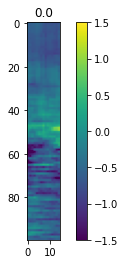

date:180322, rec:005, time:6336.0


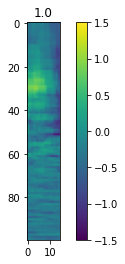

date:180325, rec:009, time:6557.0


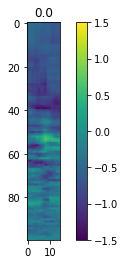

date:180323, rec:007, time:5468.0


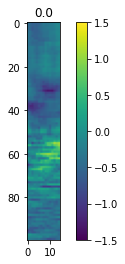

date:180325, rec:007, time:2803.0


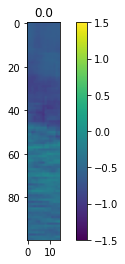

date:180325, rec:001, time:747.0


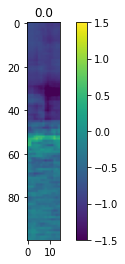

date:180323, rec:007, time:6983.0


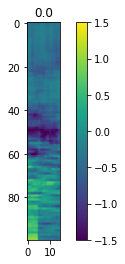

date:180401, rec:003, time:962.0


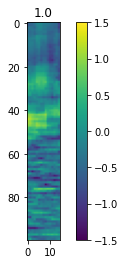

date:180323, rec:002, time:42.0


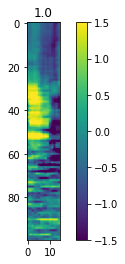

date:180322, rec:007, time:1469.0


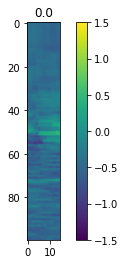

date:180325, rec:007, time:5480.0


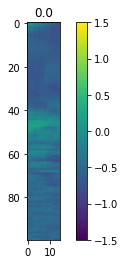

date:180325, rec:007, time:6665.0


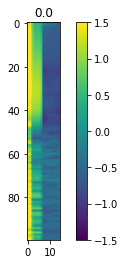

date:180324, rec:008, time:1618.0


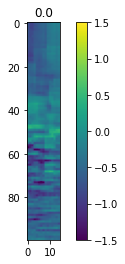

date:180324, rec:009, time:192.0


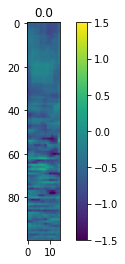

date:180325, rec:007, time:5900.0


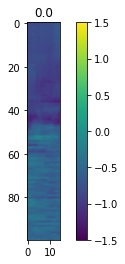

date:180325, rec:007, time:4325.0


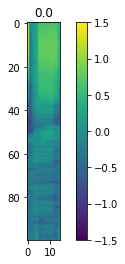

date:180401, rec:003, time:477.0


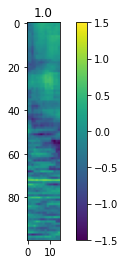

date:180325, rec:007, time:3133.0


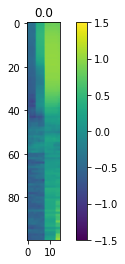

date:180324, rec:008, time:2800.0


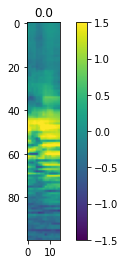

date:180325, rec:004, time:6319.0


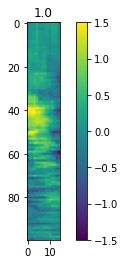

date:180325, rec:001, time:1617.0


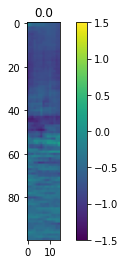

date:180401, rec:001, time:4519.0


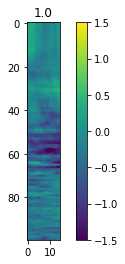

date:180401, rec:002, time:2563.0


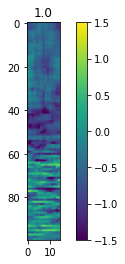

date:180323, rec:002, time:6940.0


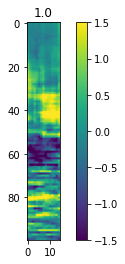

date:180323, rec:007, time:5498.0


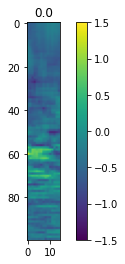

date:180324, rec:005, time:5873.0


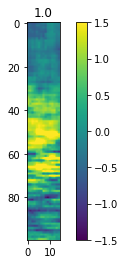

date:180324, rec:009, time:1104.0


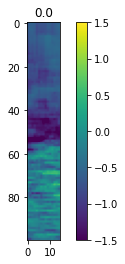

date:180401, rec:001, time:522.0


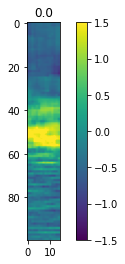

In [6]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [7]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 15

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [8]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5001199841499329
Val loss for epoch 0: 0.3370838761329651
Train loss for epoch 1: 0.4363757371902466
Val loss for epoch 1: 0.3830925524234772
Train loss for epoch 2: 0.410196989774704
Val loss for epoch 2: 0.3292883336544037
2
Train loss for epoch 3: 0.40481504797935486
Val loss for epoch 3: 0.3592844307422638
Train loss for epoch 4: 0.3979092538356781
Val loss for epoch 4: 0.34384089708328247
Train loss for epoch 5: 0.39286917448043823
Val loss for epoch 5: 0.34530317783355713
Train loss for epoch 6: 0.3894517123699188
Val loss for epoch 6: 0.34403058886528015
Train loss for epoch 7: 0.38389524817466736
Val loss for epoch 7: 0.3534161448478699
Train loss for epoch 8: 0.38009113073349
Val loss for epoch 8: 0.3488340377807617
Train loss for epoch 9: 0.37444987893104553
Val loss for epoch 9: 0.3525836765766144
Train loss for epoch 10: 0.37221333384513855
Val loss for epoch 10: 0.3406933546066284
Train loss for epoch 11: 0.3688262104988098
Val loss for epoch 11: 

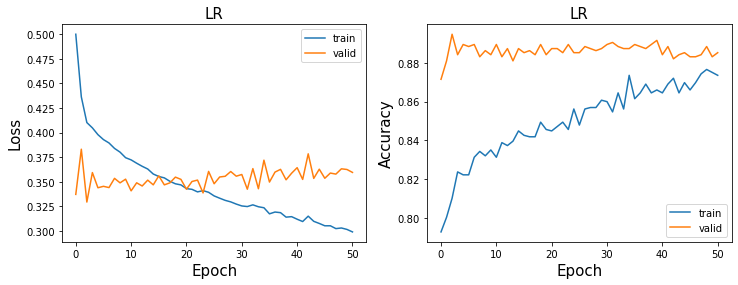

In [9]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

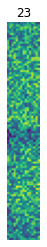

In [10]:
model = GLM(input_dim=100*timewindow).to(device)
path =model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [15]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.6891492605209351 accuracy:0.6280752532561505


In [16]:
np.mean(np.concatenate(test_labels))

0.51037145

In [17]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

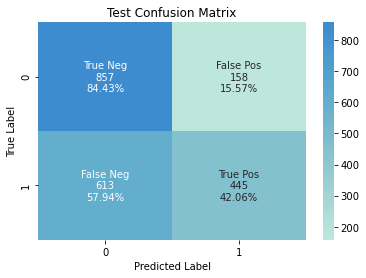

In [18]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:3311.0, label:1.0
Original data 62 CH


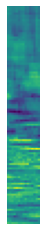

In [19]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [20]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1 #try 0.3, 0.5, 0.7
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
timewindow = 15

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [21]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.48127996921539307
Val loss for epoch 0: 0.3518688380718231
Train loss for epoch 1: 0.4283451735973358
Val loss for epoch 1: 0.3372856378555298
1
Train loss for epoch 2: 0.4139292538166046
Val loss for epoch 2: 0.3464294672012329
Train loss for epoch 3: 0.39928117394447327
Val loss for epoch 3: 0.34232965111732483
Train loss for epoch 4: 0.39371129870414734
Val loss for epoch 4: 0.343475878238678
Train loss for epoch 5: 0.38887086510658264
Val loss for epoch 5: 0.342290997505188
Train loss for epoch 6: 0.38210028409957886
Val loss for epoch 6: 0.3468635082244873
Train loss for epoch 7: 0.37633833289146423
Val loss for epoch 7: 0.3317970335483551
7
Train loss for epoch 8: 0.3746860921382904
Val loss for epoch 8: 0.34937453269958496
Train loss for epoch 9: 0.36753806471824646
Val loss for epoch 9: 0.3376843333244324
Train loss for epoch 10: 0.36465010046958923
Val loss for epoch 10: 0.35143086314201355
Train loss for epoch 11: 0.3610568344593048
Val loss for epoc

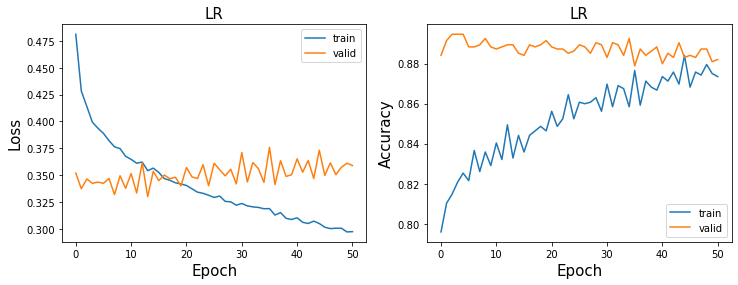

In [22]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

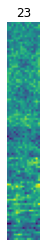

In [23]:
model = GLM(input_dim=100*timewindow).to(device)
path =model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [25]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.674233078956604 accuracy:0.6464061746261457


In [26]:
np.mean(np.concatenate(test_labels))

0.51037145

In [27]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

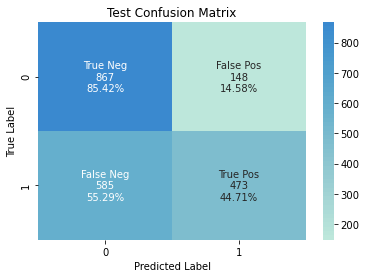

In [28]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:3311.0, label:1.0
Original data 62 CH


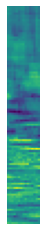

In [29]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic Regression with finite difference regularization

In [30]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 15

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [31]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5758262872695923
Val loss for epoch 0: 0.3610159158706665
Train loss for epoch 1: 0.47081607580184937
Val loss for epoch 1: 0.3558371067047119
1
Train loss for epoch 2: 0.42643359303474426
Val loss for epoch 2: 0.350665807723999
2
Train loss for epoch 3: 0.4110561013221741
Val loss for epoch 3: 0.331777423620224
3
Train loss for epoch 4: 0.40202218294143677
Val loss for epoch 4: 0.34869784116744995
Train loss for epoch 5: 0.39616236090660095
Val loss for epoch 5: 0.3400786221027374
Train loss for epoch 6: 0.3910254240036011
Val loss for epoch 6: 0.3404097855091095
Train loss for epoch 7: 0.3869496285915375
Val loss for epoch 7: 0.34482109546661377
Train loss for epoch 8: 0.38393259048461914
Val loss for epoch 8: 0.3386323153972626
Train loss for epoch 9: 0.37968599796295166
Val loss for epoch 9: 0.3468526303768158
Train loss for epoch 10: 0.3762958347797394
Val loss for epoch 10: 0.34561145305633545
Train loss for epoch 11: 0.37274831533432007
Val loss for epo

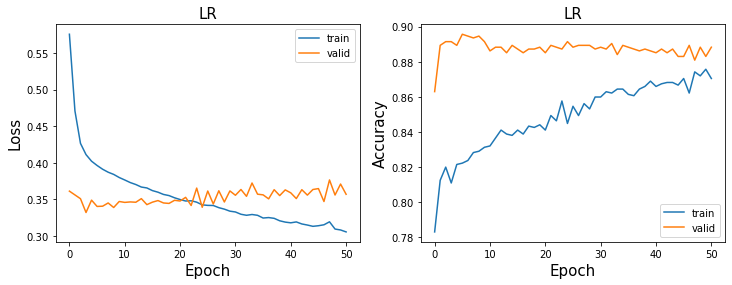

In [32]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

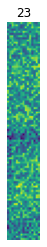

In [33]:
model = GLM(input_dim=100*timewindow).to(device)
path =model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [34]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.6794793605804443 accuracy:0.6266280752532561


In [35]:
np.mean(np.concatenate(test_labels))

0.51037145

In [36]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

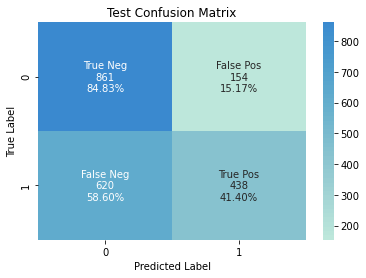

In [37]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

### SVM without regularization

### SVM with L2 regularization

In [15]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6851320862770081
Val loss for epoch 0: 0.7111771702766418
Train loss for epoch 1: 0.6442375183105469
Val loss for epoch 1: 0.7678999900817871
Train loss for epoch 2: 0.6391520500183105
Val loss for epoch 2: 0.7529788017272949
Train loss for epoch 3: 0.6417877078056335
Val loss for epoch 3: 0.6641672253608704
3
Train loss for epoch 4: 0.6390126347541809
Val loss for epoch 4: 0.6984342932701111
Train loss for epoch 5: 0.6404396295547485
Val loss for epoch 5: 0.7401537895202637
Train loss for epoch 6: 0.639179527759552
Val loss for epoch 6: 0.6993381977081299
Train loss for epoch 7: 0.6405513882637024
Val loss for epoch 7: 0.6649073362350464
Train loss for epoch 8: 0.6384839415550232
Val loss for epoch 8: 0.6716033816337585
Train loss for epoch 9: 0.6426579356193542
Val loss for epoch 9: 0.7246717214584351
Train loss for epoch 10: 0.6410369277000427
Val loss for epoch 10: 0.714557945728302
Train loss for epoch 11: 0.640546977519989
Val loss for epoch 11: 0.700012

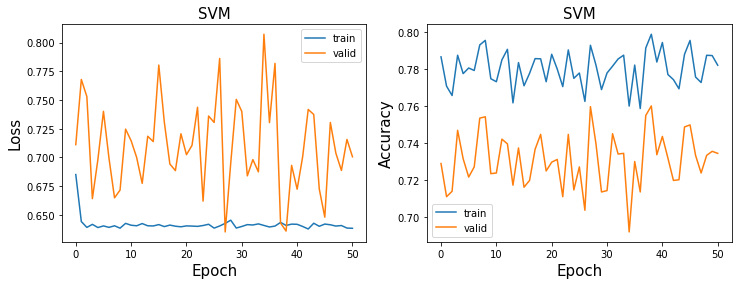

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [16]:
best_epoch = 27

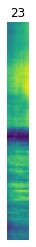

In [17]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.9384552836418152 accuracy:0.6475384615384615


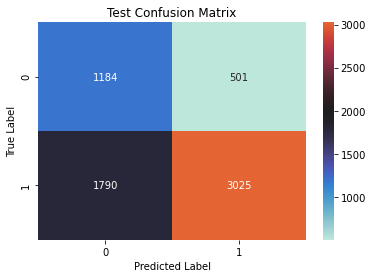

In [19]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


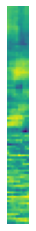

In [20]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_4[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6690675616264343
Val loss for epoch 0: 0.7053626179695129
Train loss for epoch 1: 0.579605758190155
Val loss for epoch 1: 0.6587177515029907
1
Train loss for epoch 2: 0.5777973532676697
Val loss for epoch 2: 0.661455512046814
Train loss for epoch 3: 0.5772103071212769
Val loss for epoch 3: 0.6873345375061035
Train loss for epoch 4: 0.5797932744026184
Val loss for epoch 4: 0.6312553286552429
4
Train loss for epoch 5: 0.5747454762458801
Val loss for epoch 5: 0.6387228965759277
Train loss for epoch 6: 0.5753779411315918
Val loss for epoch 6: 0.6457529067993164
Train loss for epoch 7: 0.5756300687789917
Val loss for epoch 7: 0.570262610912323
7
Train loss for epoch 8: 0.5766920447349548
Val loss for epoch 8: 0.6651206016540527
Train loss for epoch 9: 0.5784576535224915
Val loss for epoch 9: 0.6457962989807129
Train loss for epoch 10: 0.5766485929489136
Val loss for epoch 10: 0.6799610257148743
Train loss for epoch 11: 0.577312171459198
Val loss for epoch 11: 0.635

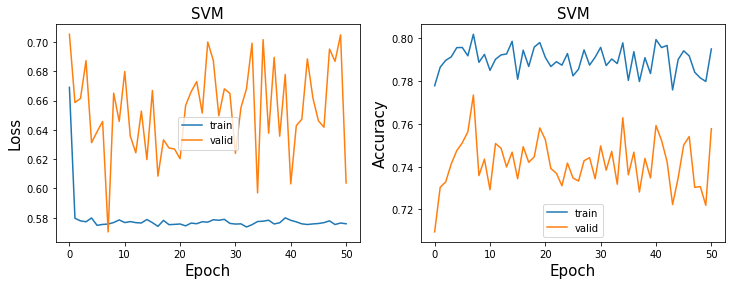

In [30]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 7

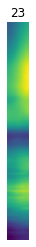

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8175214529037476 accuracy:0.6916923076923077


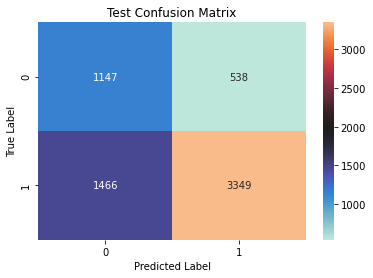

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


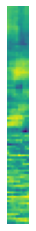

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_5[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()